In [5]:
# here goes your include modules...
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt

**TP01 - Convolução Linear em duas dimensões.**

---

A convolução linear é a operação linear em que um sistema LIT quando estimulado por um sinal qualquer $x[n]$, tem sua resposta dada por $$y[n]=\sum_{n=0}^\infty x[k]h[n-k]$$

No caso de o sinal de estímulo ter mais de uma dimensão (duas por exemplo), é preciso que o sistema tenha o mesmo número de dimensões. Nesse caso a convolução terá resposta dada por $$y[n,m]=\sum_{n=m=0}^\infty x[k,l]h[n-k,m-l]$$

Com essas informações, responda às seguintes questões:

**1.** Crie uma função de convolução linear bidimensional na forma definida abaixo. A variável ans deve retornar o resultado da convolução.

In [161]:
def conv2d(M, img):
   
  mi1=M
  #invertendo a matriz para a convolução
  for c in range(0,3):
    temp=mi1[c][0]
    mi1[c][0]=mi1[c][2]
    mi1[c][2]=temp
  temp=np.copy(mi1[0][:])
  mi1[0][:]=mi1[2][:]
  mi1[2][:]=temp
 #a partir daqui, será utilizado a multiplicação pela inversa da eye
 
 ## convolucao

  [lm,cm]=np.shape(mi1)
  [li,ci]=np.shape(img)
#zero padding
  y=np.zeros(((li+2*(lm-1)),(ci+2*(cm-1))))
  y[2:li+2,2:ci+2]=img[0:li,0:ci]
  #print(y)
  ans=np.zeros((li,ci))
  for linha in range(li):
    for col in range(ci):
      ans[linha,col]=np.sum(M*y[linha:linha+lm,col:col+cm])
  fig = plt.figure(figsize=(20,20))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.subplot(1,2,2)
  plt.imshow(ans, cmap=plt.get_cmap('gray'))

  return ans

**2.** Suponha que um sistema linear é definido por uma matriz $M$ de tamanho 3x3. Essa matriz deve ser criada de acordo com as nove primeiras letras de seu nome (a=1, b=2, c=3, ...). Proceda com a convolução linear entre a matriz $M$ e a imagem [barbara.jpg](https://github.com/rsmarinho/pdscodes/blob/master/barbara.png).

(512, 512)

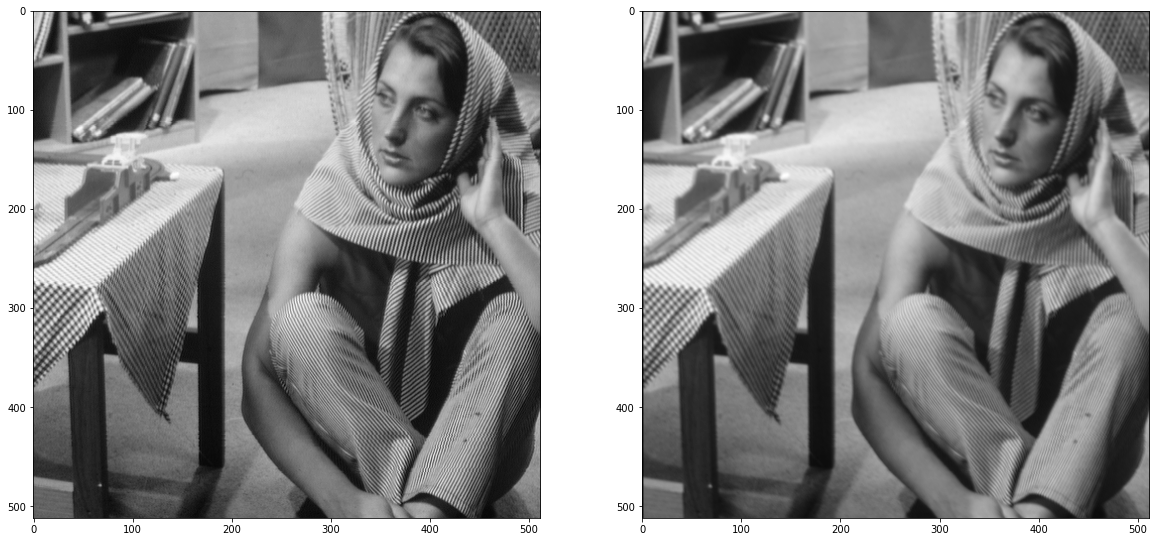

In [162]:
img = image.imread('/content/barbara.png')#.astype(float)
#print(img)

img_int = (img*255.0).astype(np.uint8)

m = np.array([[18, 21, 2], 
               [5,14,19], 
               [13, 1, 20]])


conv2d(m, img)
ans.shape





**3.** Utilize as seguintes matrizes como função de transferência do sistema e execute seu código para cada uma delas.

(512, 512)


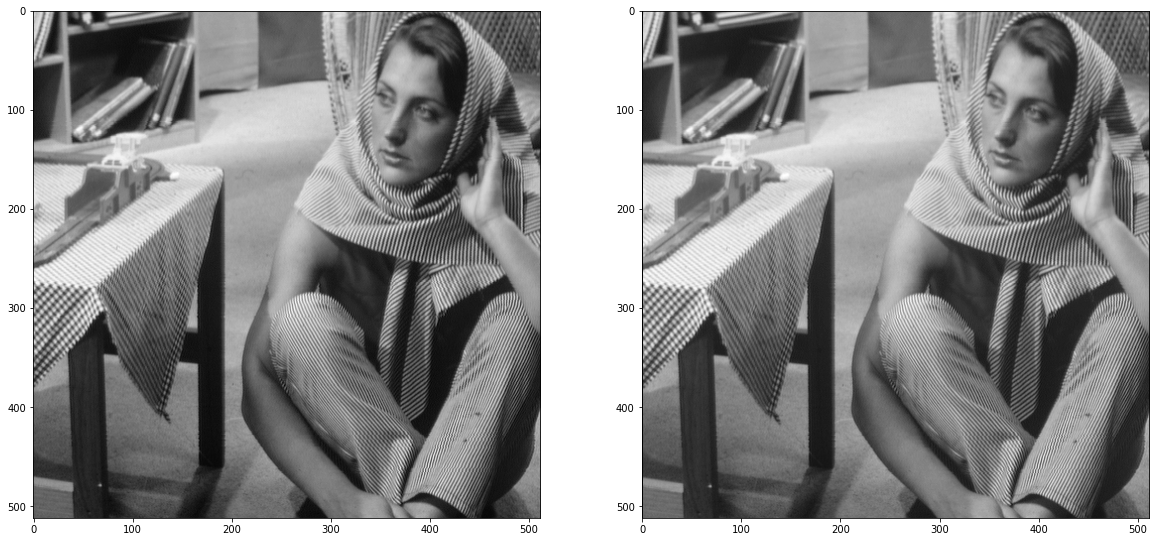

In [165]:
h1 = np.array([[1.96412803e-05, 1.76805171e-03, 1.96412803e-05], 
               [1.76805171e-03, 1.59154943e-01, 1.76805171e-03], 
               [1.96412803e-05, 1.76805171e-03, 1.96412803e-05]])

conv2d(h1, img)
print(ans.shape)


(512, 512)


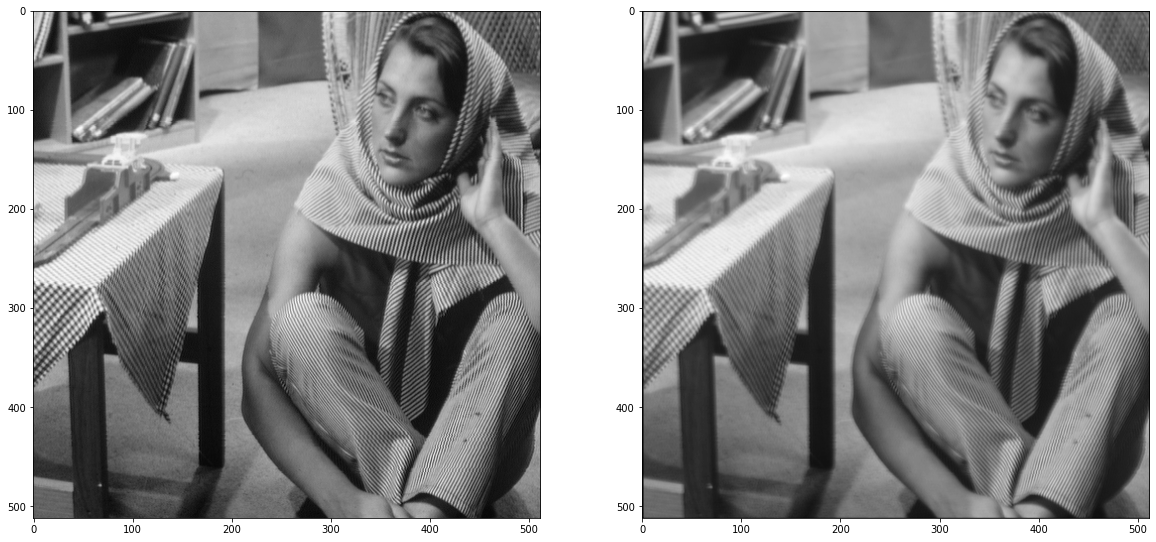

In [167]:
h2 = np.array([[1.96412803e-05, 5.74002351e-04, 1.76805171e-03, 5.74002351e-04, 1.96412803e-05], 
               [5.74002351e-04, 1.67748076e-02, 5.16700450e-02, 1.67748076e-02, 5.74002351e-04], 
               [1.76805171e-03, 5.16700450e-02, 1.59154943e-01, 5.16700450e-02, 1.76805171e-03], 
               [5.74002351e-04, 1.67748076e-02, 5.16700450e-02, 1.67748076e-02, 5.74002351e-04], 
               [1.96412803e-05, 5.74002351e-04, 1.76805171e-03, 5.74002351e-04, 1.96412803e-05]])

conv2d(h2, img)
print(ans.shape)



(512, 512)


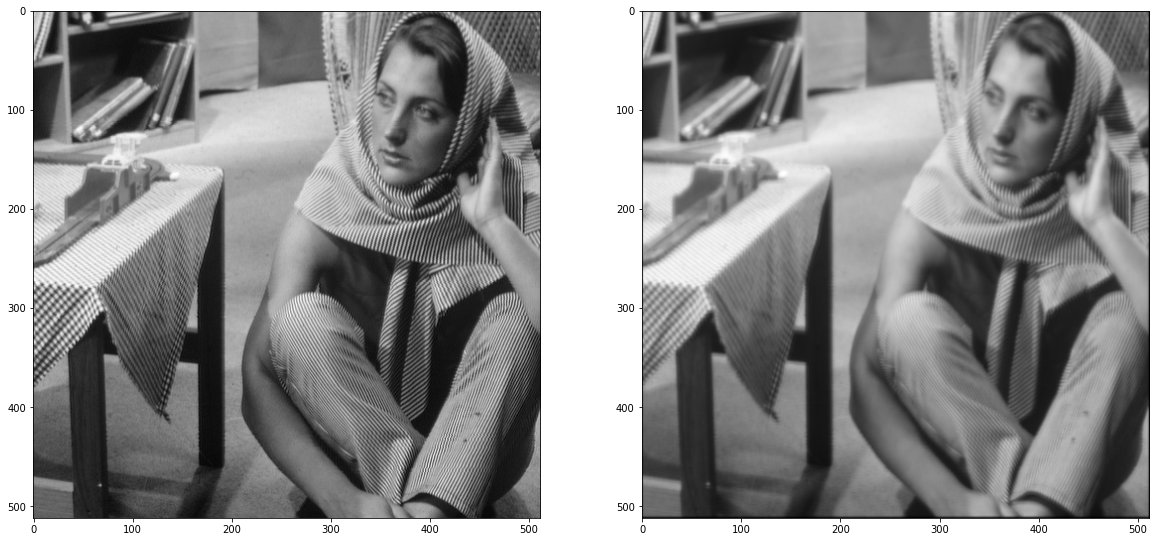

In [168]:
h3 = np.array([[1.96412803e-05, 2.39279779e-04, 1.07237757e-03, 1.76805171e-03, 1.07237757e-03, 2.39279779e-04, 1.96412803e-05],
               [2.39279779e-04, 2.91502447e-03, 1.30642333e-02, 2.15392793e-02, 1.30642333e-02, 2.91502447e-03, 2.39279779e-04],
               [1.07237757e-03, 1.30642333e-02, 5.85498315e-02, 9.65323526e-02, 5.85498315e-02, 1.30642333e-02, 1.07237757e-03],
               [1.76805171e-03, 2.15392793e-02, 9.65323526e-02, 1.59154943e-01, 9.65323526e-02, 2.15392793e-02, 1.76805171e-03],
               [1.07237757e-03, 1.30642333e-02, 5.85498315e-02, 9.65323526e-02, 5.85498315e-02, 1.30642333e-02, 1.07237757e-03],
               [2.39279779e-04, 2.91502447e-03, 1.30642333e-02, 2.15392793e-02, 1.30642333e-02, 2.91502447e-03, 2.39279779e-04],
               [1.96412803e-05, 2.39279779e-04, 1.07237757e-03, 1.76805171e-03, 1.07237757e-03, 2.39279779e-04, 1.96412803e-05]])

conv2d(h3, img)
print(ans.shape)


Após rodar seu código explique quais suas impressões sobre as imagens (processadas e não-processada), o que você achou de diferente e qual sua interpretação do processamento que o filtro faz.

Excelente trabalho para entendimento da convolução linear bidimensional saindo do péssimo costume de apenas aplicar a função pronta. Podemos ver que a imagem vai ficando mais borrada a cada matriz 'h', o que dá a sensação de ser pelo tamanho da matriz. Também deseperta a curiosidade para outros efeitos que possa ser explorado futuramente em outros sinais.